# Beige Books Analysis!

In [107]:
import pandas as pd

In [108]:
beige = pd.read_csv('final_table.csv')
#beige.iloc[:,3:].to_csv('final_table.csv', sep = ',', encoding='utf-8', index=False)

In [109]:
beige2 = pd.read_csv('improved.csv')

In [110]:
beige.iloc[:30,:]

,ID,Date,District,Sector Heading,cleaner,keywords
0,1,5-20-1970,Atlanta,Summary of Economic Activity,"['mood', 'director', 'pessimism', 'optimism', ...","['area', 'construction', 'plant', 'project', '..."
1,2,5-20-1970,Boston,Summary of Economic Activity,"['discussion', 'monday', 'friday', 'district',...","['report', 'business', 'note', 'activity', 'ar..."
2,3,5-20-1970,Chicago,Summary of Economic Activity,"['statement', 'conversation', 'mood', 'pessimi...","['decline', 'strike', 'demand', 'money', 'bank..."
3,4,5-20-1970,Cleveland,Summary of Economic Activity,"['activity', 'district', 'past', 'week', 'truc...","['price', 'economist', 'director', 'report', '..."
4,5,5-20-1970,Dallas,Summary of Economic Activity,"['inflation', 'concern', 'district', 'board', ...","['district', 'employment', 'increase', 'sale',..."
5,6,5-20-1970,Kansas City,Summary of Economic Activity,"['consensus', 'base', 'discussion', 'member', ...","['farm', 'construction', 'price', 'report', 's..."
6,7,5-20-1970,Minneapolis,Summary of Economic Activity,"['indication', 'reserve', 'district', 'rest', ...","['year', 'director', 'area', 'percent', 'strik..."
7,8,5-20-1970,New York,Summary of Economic Activity,"['reserve', 'district', 'board', 'director', '...","['director', 'consumer', 'note', 'capital', 'l..."
8,9,5-20-1970,Philadelphia,Summary of Economic Activity,"['business', 'slowdown', 'economy', 'month', '...","['business', 'economy', 'activity', 'area', 'm..."
9,10,5-20-1970,Richmond,"Production, Sales, and Inventories","['district', 'survey', 'trade', 'service', 'de...","['report', 'district', 'inventory', 'level', '..."


In [111]:
beige['Sector Heading'].unique()

array(['Summary of Economic Activity',
       'Production, Sales, and Inventories', 'Employment and Unemployment',
       'Wages and Prices', 'Construction', 'Loan Demand', 'Outlook',
       'Capital Spending', 'Inventory Investment',
       'General Conditions and Consumer Spending', 'General',
       'Random Notes by Industry', 'Employment', 'Strikes', 'Wages',
       'Other Costs', 'Prices', 'Profits', 'Market Psychology', 'Sales',
       'Plant and Equipment Investment', 'Credit', 'Policy',
       'Summary of Findings', 'Retail sales', 'Belt tightening',
       'Production and employment', 'Capital spending and construction',
       'Agriculture', 'Loan terms',
       'Seven members of our Board of Directors and three',
       'Monetary Conditions and Capital Markets',
       'GNP and Real Market Aggregates',
       'Rumors persist that progress is being made in the',
       'business shortly.', 'Excluding western Oklahoma and New Mexico',
       'as high as 5 percent.',
       'de

In [112]:
#beige2['clean']

In [113]:
employ = beige[beige['Sector Heading'].isin(['Unemployment','Employment','Employment and Unemployment'])]

# Visualization
---
1. Word cloud
2. Compare keywords for a certain year between sf and richmond
housing bubble -- number of times estate comes up over time
2. Exploratory setiment stuff
3. Changes in sentiment of employment from 1975/1980 to 1990, for every district (bar charts of district employment keywords per year)

In [114]:
from wordcloud import WordCloud

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
import folium
from IPython.display import HTML, display, IFrame


In [116]:
long = []
for lst in employ['keywords']:
    lst = eval(lst)
    long = long + lst


In [117]:
string = ''
for i in long:
    string = string + ' ' + i

In [118]:
beige['District'].value_counts()

Richmond         2663
Chicago          2439
Kansas City      2435
Minneapolis      2245
Atlanta          2240
San Francisco    2177
Cleveland        2023
Dallas           1962
St Louis         1858
Philadelphia     1725
New York         1681
Boston           1674
Name: District, dtype: int64

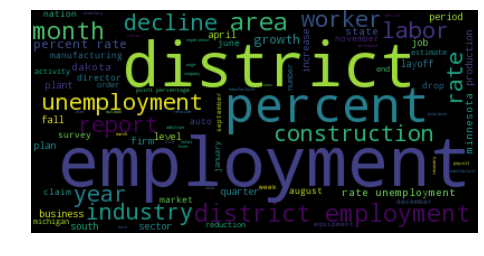

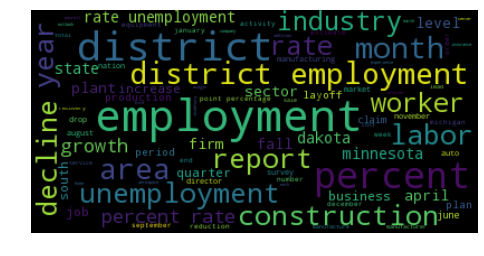

In [119]:
wordcloud = WordCloud().generate(string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(string)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [128]:
# employ['keywords'] = employ['keywords'].map(lambda x: eval(x))
keywords_by_district = employ.groupby('District')['keywords'].agg(sum)
# keywords_by_district = [keyword for keywords in keywords_by_district for keyword in keywords]
keywords_by_district[0]

['business',
 'construction',
 'cost',
 'district',
 'month',
 'number',
 'oil',
 'plant',
 'reduction',
 'state',
 'worker',
 'year',
 'layoff',
 'claim',
 'district',
 'level',
 'product',
 'report',
 'south',
 'state',
 'year',
 'percent',
 'employment',
 'level',
 'employer',
 'ad',
 'area',
 'public',
 'report',
 'response',
 'industry',
 'district',
 'employment',
 'problem',
 'layoff',
 'government',
 'performance',
 'district',
 'plant',
 'week',
 'year',
 'christma',
 'construction',
 'home',
 'order',
 'report',
 'decline',
 'employment',
 'district',
 'industry',
 'percent',
 'state',
 'layoff',
 'job',
 'november',
 'capital',
 'construction',
 'district',
 'employment',
 'percent',
 'state',
 'nation',
 'january',
 'michigan',
 'year',
 'sector',
 'government',
 'employment',
 'state',
 'worker',
 'layoff',
 'manufacturing',
 'trade',
 'unemployment',
 'benefit',
 'office',
 'transportation',
 'percent',
 'district',
 'april',
 'time',
 'work',
 'nation',
 'addition',
 'di

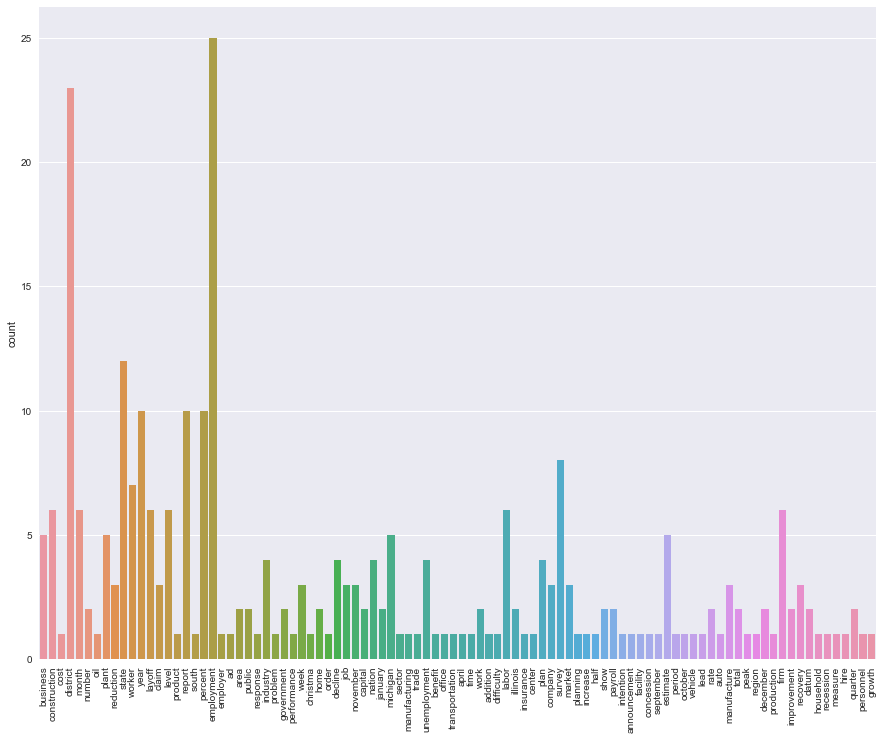

In [121]:
import seaborn as sns
from matplotlib import pyplot

a4_dims = (15, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.countplot(keywords_by_district['Chicago'])
plt.xticks(rotation=90)
plt.show()

In [125]:
display(employ.groupby('Date')['keywords'].agg(sum).reset_index())
# employ['Date'] = employ['Date'].map(lambda x: x[-4:])
employ.sort_values('Date')

employ['keywords'].iloc[0]

,Date,keywords
0,1970,"[district, employment, decline, claim, insuran..."
1,1977,"[area, job, employment, percent, strike, year,..."
2,1978,"[area, employment, unemployment, district, ind..."
3,1981,"[business, construction, cost, district, month..."
4,1982,"[employment, district, industry, percent, stat..."
5,1983,"[employment, worker, work, michigan, illinois,..."
6,1984,"[percent, district, employment, state, michiga..."
7,1985,"[worker, fall, minnesota, employment, south, d..."
8,1986,"[employment, plant, worker, rate, unemployment..."
9,1987,"[employment, district, state, year, total, nat..."


['district',
 'employment',
 'decline',
 'claim',
 'insurance',
 'month',
 'report',
 'week',
 'businessman',
 'hand']

In [132]:
# By Year

pyplot.subplots(11, 12)

all_keywords = []
for lst in employ['keywords']:
    all_keywords.extend(lst)
    
all_keywords = set(all_keywords)

for date in employ['Date']:
    keywords = employ[[employ['Date'] == date]]['keywords']
    keywords_by_district = employ.groupby('District')['keywords'].agg(sum)
    # keywords_by_district = [keyword for keywords in keywords_by_district for keyword in keywords]

    a4_dims = (15, 12)
    fig, ax = pyplot.subplots(figsize=a4_dims)

    ax = sns.countplot(keywords)
    plt.xticks(rotation=90)
    plt.show()

ValueError: Item wrong length 1 instead of 132.